In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [2]:
with open('test.txt', 'r', encoding='utf-8') as f:
    lines = []
    file_data = f.readlines()
    for line in file_data:
        line = line.replace("\n", "")
        line = line.replace(".", "")
        line = line.replace(",", "")
        line = line.replace(":", "")
        line = line.replace("[", "")
        line = line.replace("]", "")
        line = line.replace("(", "")
        line = line.replace(")", "")
        line = line.replace("*", "")
        line = line.replace("?", "")
        line = line.replace("!", "")
        line = line.replace("’", "")
        line = line.replace("‘", "")
        line = line.replace("“", "")
        line = line.replace("”", "")
        line = line.replace(";", "")
        line = line.replace("—", "")
        line = line.replace("_", "")
        line = line.replace("…", "")
        line = line.replace("#", "")
        line = line.replace("/", "")
        line = line.replace("\"", "")
        line = line.replace("\'", "")
        line = line.replace("$", "")
        line = line.replace("", "")
        line = line.lower()
        if line:
            lines.append(line)

In [3]:
lines

['the project gutenberg ebook of the time machine by h g wells',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever you may copy it give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at',
 'wwwgutenbergorg if you are not located in the united states you',
 'will have to check the laws of the country where you are located before',
 'using this ebook',
 'title the time machine',
 'author h g wells',
 'release date july 1992 ebook 35',
 'most recently updated october 22 2020',
 'language english',
 'character set encoding utf-8',
 ' start of the project gutenberg ebook the time machine ',
 'the time machine',
 'an invention',
 'by h g wells',
 'contents',
 ' i introduction',
 ' ii the machine',
 ' iii the time traveller returns',
 ' iv time travelling',
 ' v in the golden age',
 ' vi the sunset of mankind',
 ' vii a

In [4]:
def create_char_dict(lines):
    chars = {}
    char_dict = {}
    
    for sentence in lines:
        for char in sentence:
            if char not in chars:
                chars[char] = 1
            else:
                chars[char] += 1
                
    char_list = sorted(chars.items(), key=lambda x:x[1], reverse=True)
    
    char_dict["<eos>"] = 0
    
    ids = 1
    for char in char_list:
        char_dict[char[0]] = ids
        ids += 1
        
    return char_dict
            
def line_to_char_dict(line, chars):
    sentences = []
    for sentence in line:
        for char in sentence:
            if char in chars:
                sentences.append(chars[char])
    sentences.append(chars["<eos>"])
    return sentences

def sentence_to_char_dict(lines):
    chars = create_char_dict(lines)
    out = []
    for sentence in lines:
        out.append(line_to_char_dict(sentence, chars))
    return out

In [5]:
create_char_dict(lines)

{'<eos>': 0,
 ' ': 1,
 'e': 2,
 't': 3,
 'a': 4,
 'i': 5,
 'o': 6,
 'n': 7,
 's': 8,
 'r': 9,
 'h': 10,
 'd': 11,
 'l': 12,
 'm': 13,
 'u': 14,
 'c': 15,
 'f': 16,
 'w': 17,
 'g': 18,
 'y': 19,
 'p': 20,
 'b': 21,
 'v': 22,
 'k': 23,
 'x': 24,
 '-': 25,
 'j': 26,
 'z': 27,
 'q': 28,
 '1': 29,
 '0': 30,
 '3': 31,
 '5': 32,
 '2': 33,
 '8': 34,
 '9': 35,
 '4': 36,
 '6': 37,
 'æ': 38,
 '7': 39,
 'œ': 40,
 'ü': 41,
 'ç': 42,
 '%': 43}

In [6]:
print(sentence_to_char_dict(lines))

[[3, 10, 2, 1, 20, 9, 6, 26, 2, 15, 3, 1, 18, 14, 3, 2, 7, 21, 2, 9, 18, 1, 2, 21, 6, 6, 23, 1, 6, 16, 1, 3, 10, 2, 1, 3, 5, 13, 2, 1, 13, 4, 15, 10, 5, 7, 2, 1, 21, 19, 1, 10, 1, 18, 1, 17, 2, 12, 12, 8, 0], [3, 10, 5, 8, 1, 2, 21, 6, 6, 23, 1, 5, 8, 1, 16, 6, 9, 1, 3, 10, 2, 1, 14, 8, 2, 1, 6, 16, 1, 4, 7, 19, 6, 7, 2, 1, 4, 7, 19, 17, 10, 2, 9, 2, 1, 5, 7, 1, 3, 10, 2, 1, 14, 7, 5, 3, 2, 11, 1, 8, 3, 4, 3, 2, 8, 1, 4, 7, 11, 0], [13, 6, 8, 3, 1, 6, 3, 10, 2, 9, 1, 20, 4, 9, 3, 8, 1, 6, 16, 1, 3, 10, 2, 1, 17, 6, 9, 12, 11, 1, 4, 3, 1, 7, 6, 1, 15, 6, 8, 3, 1, 4, 7, 11, 1, 17, 5, 3, 10, 1, 4, 12, 13, 6, 8, 3, 1, 7, 6, 1, 9, 2, 8, 3, 9, 5, 15, 3, 5, 6, 7, 8, 0], [17, 10, 4, 3, 8, 6, 2, 22, 2, 9, 1, 19, 6, 14, 1, 13, 4, 19, 1, 15, 6, 20, 19, 1, 5, 3, 1, 18, 5, 22, 2, 1, 5, 3, 1, 4, 17, 4, 19, 1, 6, 9, 1, 9, 2, 25, 14, 8, 2, 1, 5, 3, 1, 14, 7, 11, 2, 9, 1, 3, 10, 2, 1, 3, 2, 9, 13, 8, 0], [6, 16, 1, 3, 10, 2, 1, 20, 9, 6, 26, 2, 15, 3, 1, 18, 14, 3, 2, 7, 21, 2, 9, 18, 1, 12, 5, 15, 2, 

In [7]:
def create_word_dict(lines):
    words = {}
    vocabulary = {}
    
    for sentence in lines:
        sentence = sentence.split(" ")
        for word in sentence:
            if word:
                if word not in words:
                    words[word] = 1
                else:
                    words[word] += 1
    words_list = sorted(words.items(), key=lambda x:x[1], reverse=True)
    
    ids = 0
    for word in words_list:
        vocabulary[word[0]] = ids
        ids += 1
        
    return vocabulary

def line_to_word_dict(line, words):
    sentences = []
    line = line.split(" ")
    for word in line:
        if word:
            if word in words:
                sentences.append(words[word])
    return sentences

def sentence_to_word_dict(lines):
    words = create_word_dict(lines)
    out = []
    for sentence in lines:
        out.append(line_to_word_dict(sentence, words))
    return out


In [8]:
print(create_word_dict(lines))

{'the': 0, 'and': 1, 'of': 2, 'i': 3, 'a': 4, 'to': 5, 'in': 6, 'was': 7, 'that': 8, 'my': 9, 'it': 10, 'had': 11, 'me': 12, 'as': 13, 'with': 14, 'at': 15, 'for': 16, 'time': 17, 'you': 18, 'but': 19, 'this': 20, 'or': 21, 'were': 22, 'on': 23, 'not': 24, 'from': 25, 'all': 26, 'then': 27, 'his': 28, 'have': 29, 'by': 30, 'is': 31, 'there': 32, 'they': 33, 'he': 34, 'so': 35, 'upon': 36, 'little': 37, 'into': 38, 'be': 39, 'one': 40, 'came': 41, 'no': 42, 'some': 43, 'could': 44, 'machine': 45, 'an': 46, 'their': 47, 'we': 48, 'said': 49, 'project': 50, 'which': 51, 'saw': 52, 'down': 53, 'its': 54, 'very': 55, 'them': 56, 'now': 57, 'these': 58, 'about': 59, 'what': 60, 'any': 61, 'been': 62, 'her': 63, 'up': 64, 'out': 65, 'seemed': 66, 'if': 67, 'are': 68, 'man': 69, 'thing': 70, 'like': 71, 'white': 72, 'our': 73, 'again': 74, 'more': 75, 'must': 76, 'would': 77, 'traveller': 78, 'when': 79, 'felt': 80, 'gutenberg-tm': 81, 'thought': 82, 'work': 83, 'other': 84, 'before': 85, 'ove

In [9]:
#Q2

"""
char_num = len(create_char_dict(lines))

def line2vec(line, dic):
    vec = torch.zeros(len(line)+1, char_num)
    for i, char in enumerate(line):
        vec[i][dic[char]] = 1
    return vec

def lines2vec(lines):
    vec = []
    dic = create_char_dict(lines)
    for line in lines:
        vec.append(line2vec(line, dic))
    return vec
"""




class train_test_dataset(Dataset):
    def __init__(self, lines, train=True, partition=30):
        super().__init__()
        
        vector = sentence_to_char_dict(lines)
        
        train_data = vector[:int(len(vector)*0.9)]
        test_data = vector[int(len(vector)*0.9):]
        
        
        self.data,self.label = [],[]
        
        if train:
            self.data, self.label = self.create_dataset(train_data,partition)
        else:
            self.data, self.label = self.create_dataset(test_data,partition)
    
    def create_dataset(self, lines, length):
        data = []
        label = []
        for line in lines:
            if len(line) <= length:
                continue
            for i in range(len(line) - length):
                x = torch.as_tensor(line[i:i+length])
                x = x.reshape((1, -1))
                y = torch.as_tensor(line[i+length])
                data.append(x)
                label.append(y)
        return data, label
            
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index], self.label[index]

        

In [10]:
train_dataset = train_test_dataset(lines)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = train_test_dataset(lines, train=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [11]:
#Q3

class myRNN(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.n_layers = 1
        self.hidden_size = 32
        self.rnn1 = nn.RNN(in_size, self.hidden_size, self.n_layers, batch_first=True)
        self.rnn2 = nn.RNN(self.hidden_size, self.hidden_size, self.n_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_size, out_size)

    def forward(self, x):
        x, hidden = self.rnn1(x)
        x = F.softmax(x)
        #x = self.drop(x)
        x, hidden = self.rnn2(x, hidden)
        x = F.relu(x)
        x = self.fc(x[:, -1])
        return x, hidden
   

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

net = myRNN(30,44)
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

best_score = 100.0
count = 0
stop = 5

epoch_num = 300
running_loss = np.zeros(epoch_num)
train_acc = np.zeros(epoch_num)
train_perplexity = np.zeros(epoch_num)

for epoch in range(epoch_num):
    train_correct = 0
    train_count = 0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            outputs, h = net(inputs.float())
            loss = criterion(outputs, labels) 
            _, pred_label = torch.max(outputs, 1)
            perplexity = torch.exp(loss)
        loss.backward() 
        optimizer.step() 
        running_loss[epoch] += loss.item()
    
    train_correct += torch.sum(pred_label== labels.data).item()  
    train_count += labels.size(0)
    train_acc[epoch] = train_correct/train_count
  
    running_loss[epoch] /= len(train_loader)
    train_perplexity[epoch] += np.exp(running_loss[epoch])
    
    
    if train_perplexity[epoch] > best_score:
        count += 1
        print("count:", count)

    else:
        count = 0
        best_score = train_perplexity[epoch]

    if count >= stop:
        print("early stopping")
        break
    
    

    print("epoch : %d, train_loss : %.4lf, train_acc : %.4lf,  train_perplexity : %.4lf" 
          % (epoch, running_loss[epoch], train_acc[epoch], train_perplexity[epoch]))
    
test_acc = 0.0
correct = 0.0
count = 0.0
test_loss = 0.0
test_perplexity = 0.0

with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        images, labels = data[0].to(device), data[1].to(device)
        outputs, h = net(images.float())
        loss = criterion(outputs, labels) 
        _, pred_label = torch.max(outputs.data, 1)
        test_loss += loss.item()
    
    correct += torch.sum(pred_label == labels.data).item()  
    count += labels.size(0)
    
test_acc = correct/count
test_perplexity += np.exp(test_loss/len(test_loader))
print("test_acc:%.4lf, test_perplexity:%.4lf" % (test_acc, test_perplexity))


cpu


<ipython-input-11-ced5f5fe1e17>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


epoch : 0, train_loss : 3.1515, train_acc : 0.1636,  train_perplexity : 23.3713
epoch : 1, train_loss : 2.9248, train_acc : 0.0727,  train_perplexity : 18.6300
epoch : 2, train_loss : 2.8933, train_acc : 0.2182,  train_perplexity : 18.0525
epoch : 3, train_loss : 2.8511, train_acc : 0.2000,  train_perplexity : 17.3073
epoch : 4, train_loss : 2.8202, train_acc : 0.1273,  train_perplexity : 16.7797
epoch : 5, train_loss : 2.8065, train_acc : 0.2545,  train_perplexity : 16.5511
epoch : 6, train_loss : 2.7974, train_acc : 0.1273,  train_perplexity : 16.4013
epoch : 7, train_loss : 2.7887, train_acc : 0.1636,  train_perplexity : 16.2597
epoch : 8, train_loss : 2.7765, train_acc : 0.0909,  train_perplexity : 16.0630
epoch : 9, train_loss : 2.7622, train_acc : 0.1818,  train_perplexity : 15.8351
epoch : 10, train_loss : 2.7493, train_acc : 0.2545,  train_perplexity : 15.6320
epoch : 11, train_loss : 2.7370, train_acc : 0.1273,  train_perplexity : 15.4405
epoch : 12, train_loss : 2.7270, train

count: 1
epoch : 101, train_loss : 2.3951, train_acc : 0.4000,  train_perplexity : 10.9695
epoch : 102, train_loss : 2.3935, train_acc : 0.2000,  train_perplexity : 10.9521
epoch : 103, train_loss : 2.3919, train_acc : 0.4000,  train_perplexity : 10.9343
count: 1
epoch : 104, train_loss : 2.3923, train_acc : 0.3455,  train_perplexity : 10.9389
epoch : 105, train_loss : 2.3916, train_acc : 0.3636,  train_perplexity : 10.9310
epoch : 106, train_loss : 2.3879, train_acc : 0.4545,  train_perplexity : 10.8901
count: 1
epoch : 107, train_loss : 2.3879, train_acc : 0.3455,  train_perplexity : 10.8906
epoch : 108, train_loss : 2.3877, train_acc : 0.3818,  train_perplexity : 10.8889
epoch : 109, train_loss : 2.3862, train_acc : 0.3818,  train_perplexity : 10.8721
epoch : 110, train_loss : 2.3853, train_acc : 0.2727,  train_perplexity : 10.8625
epoch : 111, train_loss : 2.3835, train_acc : 0.2727,  train_perplexity : 10.8430
count: 1
epoch : 112, train_loss : 2.3851, train_acc : 0.2909,  train_p

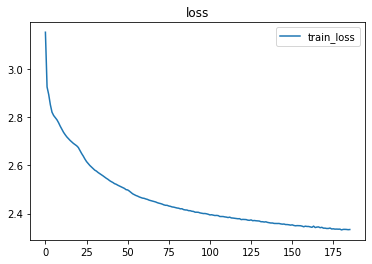

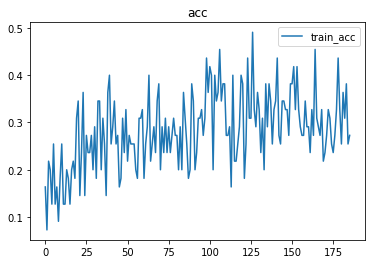

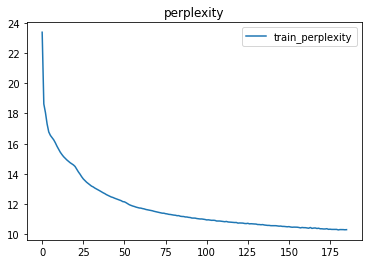

In [13]:
plt.figure()
plt.plot(running_loss[0:epoch+1], label = "train_loss")
plt.legend()
plt.title('loss')
plt.savefig('%s.png' % ("Q3_loss"))

plt.figure()
plt.plot(train_acc[0:epoch+1], label = "train_acc")
plt.legend()
plt.title('acc')
plt.savefig('%s.png' % ("Q3_acc"))

plt.figure()
plt.plot(train_perplexity[0:epoch+1], label = "train_perplexity")
plt.legend()
plt.title('perplexity')
plt.savefig('%s.png' % ("Q3_perplexity"))

In [14]:
#Q4
train_dataset = train_test_dataset(lines)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = train_test_dataset(lines, train=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [16]:
class myGRU(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.n_layers = 1
        self.hidden_size = 32
        self.gru1 = nn.GRU(in_size, self.hidden_size, self.n_layers, batch_first=True)
        self.gru2 = nn.GRU(self.hidden_size, self.hidden_size, self.n_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_size, out_size)

    def forward(self, x):
        x, hidden = self.gru1(x)
        x = F.softmax(x)
        x, hidden = self.gru2(x, hidden)
        x = F.relu(x)
        x = self.fc(x[:, -1])
        return x, hidden
   

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

net = myGRU(30,44)
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

best_score = 100.0
count = 0
stop = 5

epoch_num = 300
running_loss = np.zeros(epoch_num)
train_acc = np.zeros(epoch_num)
train_perplexity = np.zeros(epoch_num)

for epoch in range(epoch_num):
    train_correct = 0
    train_count = 0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            outputs, h = net(inputs.float())
            loss = criterion(outputs, labels) 
            _, pred_label = torch.max(outputs, 1)
            perplexity = torch.exp(loss)
        loss.backward() 
        optimizer.step() 
        running_loss[epoch] += loss.item()
    
    train_correct += torch.sum(pred_label== labels.data).item()  
    train_count += labels.size(0)
    train_acc[epoch] = train_correct/train_count
  
    running_loss[epoch] /= len(train_loader)
    train_perplexity[epoch] += np.exp(running_loss[epoch])
    
    
    if train_perplexity[epoch] > best_score:
        count += 1
        print("count:", count)

    else:
        count = 0
        best_score = train_perplexity[epoch]

    if count >= stop:
        print("early stopping")
        break
    
    

    print("epoch : %d, train_loss : %.4lf, train_acc : %.4lf,  train_perplexity : %.4lf" 
          % (epoch, running_loss[epoch], train_acc[epoch], train_perplexity[epoch]))
    
test_acc = 0.0
correct = 0.0
count = 0.0
test_loss = 0.0
test_perplexity = 0.0

with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        images, labels = data[0].to(device), data[1].to(device)
        outputs, h = net(images.float())
        loss = criterion(outputs, labels) 
        _, pred_label = torch.max(outputs.data, 1)
        test_loss += loss.item()
    
    correct += torch.sum(pred_label == labels.data).item()  
    count += labels.size(0)
    
test_acc = correct/count
test_perplexity += np.exp(test_loss/len(test_loader))
print("test_acc:%.4lf, test_perplexity:%.4lf" % (test_acc, test_perplexity))

cpu


<ipython-input-16-9994d7a2c340>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


epoch : 0, train_loss : 3.2246, train_acc : 0.2182,  train_perplexity : 25.1428
epoch : 1, train_loss : 2.9438, train_acc : 0.3455,  train_perplexity : 18.9882
epoch : 2, train_loss : 2.9114, train_acc : 0.1636,  train_perplexity : 18.3833
epoch : 3, train_loss : 2.8887, train_acc : 0.2545,  train_perplexity : 17.9690
epoch : 4, train_loss : 2.8604, train_acc : 0.2182,  train_perplexity : 17.4684
epoch : 5, train_loss : 2.8362, train_acc : 0.2000,  train_perplexity : 17.0508
epoch : 6, train_loss : 2.8209, train_acc : 0.1455,  train_perplexity : 16.7918
epoch : 7, train_loss : 2.8098, train_acc : 0.1273,  train_perplexity : 16.6067
epoch : 8, train_loss : 2.7991, train_acc : 0.1455,  train_perplexity : 16.4293
epoch : 9, train_loss : 2.7896, train_acc : 0.1273,  train_perplexity : 16.2751
epoch : 10, train_loss : 2.7790, train_acc : 0.1636,  train_perplexity : 16.1028
epoch : 11, train_loss : 2.7700, train_acc : 0.1818,  train_perplexity : 15.9591
epoch : 12, train_loss : 2.7617, train

epoch : 102, train_loss : 2.4617, train_acc : 0.3273,  train_perplexity : 11.7247
epoch : 103, train_loss : 2.4603, train_acc : 0.2909,  train_perplexity : 11.7084
epoch : 104, train_loss : 2.4587, train_acc : 0.2909,  train_perplexity : 11.6893
epoch : 105, train_loss : 2.4578, train_acc : 0.1818,  train_perplexity : 11.6788
epoch : 106, train_loss : 2.4560, train_acc : 0.3455,  train_perplexity : 11.6578
epoch : 107, train_loss : 2.4550, train_acc : 0.3273,  train_perplexity : 11.6467
epoch : 108, train_loss : 2.4529, train_acc : 0.2364,  train_perplexity : 11.6225
epoch : 109, train_loss : 2.4503, train_acc : 0.2909,  train_perplexity : 11.5914
epoch : 110, train_loss : 2.4497, train_acc : 0.2909,  train_perplexity : 11.5850
epoch : 111, train_loss : 2.4472, train_acc : 0.2909,  train_perplexity : 11.5556
epoch : 112, train_loss : 2.4462, train_acc : 0.1818,  train_perplexity : 11.5445
epoch : 113, train_loss : 2.4436, train_acc : 0.3455,  train_perplexity : 11.5145
epoch : 114, tra

epoch : 202, train_loss : 2.3518, train_acc : 0.3091,  train_perplexity : 10.5048
epoch : 203, train_loss : 2.3505, train_acc : 0.3091,  train_perplexity : 10.4903
epoch : 204, train_loss : 2.3500, train_acc : 0.2909,  train_perplexity : 10.4859
epoch : 205, train_loss : 2.3490, train_acc : 0.3273,  train_perplexity : 10.4751
epoch : 206, train_loss : 2.3478, train_acc : 0.2364,  train_perplexity : 10.4629
epoch : 207, train_loss : 2.3470, train_acc : 0.2909,  train_perplexity : 10.4544
count: 1
epoch : 208, train_loss : 2.3472, train_acc : 0.2000,  train_perplexity : 10.4567
epoch : 209, train_loss : 2.3450, train_acc : 0.2182,  train_perplexity : 10.4328
epoch : 210, train_loss : 2.3447, train_acc : 0.2727,  train_perplexity : 10.4305
count: 1
epoch : 211, train_loss : 2.3454, train_acc : 0.3091,  train_perplexity : 10.4370
epoch : 212, train_loss : 2.3432, train_acc : 0.2909,  train_perplexity : 10.4141
count: 1
epoch : 213, train_loss : 2.3433, train_acc : 0.3091,  train_perplexity

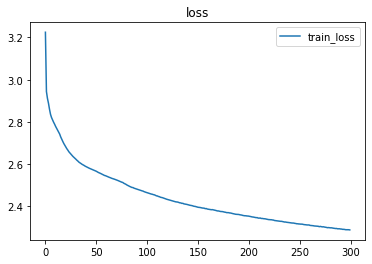

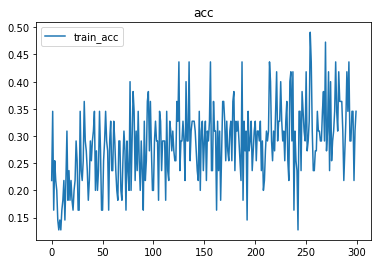

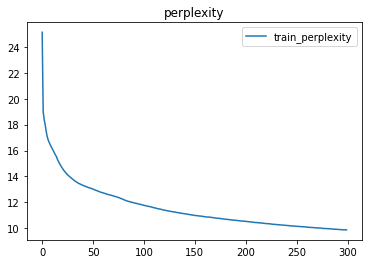

In [18]:
plt.figure()
plt.plot(running_loss[0:epoch+1], label = "train_loss")
plt.legend()
plt.title('loss')
plt.savefig('%s.png' % ("Q4_loss"))

plt.figure()
plt.plot(train_acc[0:epoch+1], label = "train_acc")
plt.legend()
plt.title('acc')
plt.savefig('%s.png' % ("Q4_acc"))

plt.figure()
plt.plot(train_perplexity[0:epoch+1], label = "train_perplexity")
plt.legend()
plt.title('perplexity')
plt.savefig('%s.png' % ("Q4_perplexity"))

In [70]:
#Q5
train_dataset = train_test_dataset(lines)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = train_test_dataset(lines, train=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [71]:
class myLSTM(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.n_layers = 1
        self.hidden_size = 32
        self.lstm1 = nn.LSTM(in_size, self.hidden_size, self.n_layers, batch_first=True)
        self.lstm2 = nn.LSTM(self.hidden_size, self.hidden_size, self.n_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_size, out_size)
        

    def forward(self, x):
        x, hidden = self.lstm1(x)
        x = F.softmax(x)
        x, hidden = self.lstm2(x, hidden)
        x = F.relu(x)
        x = self.fc(x[:, -1])
        return x, hidden

In [74]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

net = myLSTM(30,44)
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

best_score = 100.0
count = 0
stop = 5

epoch_num = 300
running_loss = np.zeros(epoch_num)
train_acc = np.zeros(epoch_num)
train_perplexity = np.zeros(epoch_num)

for epoch in range(epoch_num):
    train_correct = 0
    train_count = 0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            outputs, h = net(inputs.float())
            loss = criterion(outputs, labels) 
            _, pred_label = torch.max(outputs, 1)
            perplexity = torch.exp(loss)
        loss.backward() 
        optimizer.step() 
        running_loss[epoch] += loss.item()
    
    train_correct += torch.sum(pred_label== labels.data).item()  
    train_count += labels.size(0)
    train_acc[epoch] = train_correct/train_count
  
    running_loss[epoch] /= len(train_loader)
    train_perplexity[epoch] += np.exp(running_loss[epoch])
    
    
    if train_perplexity[epoch] > best_score:
        count += 1
        print("count:", count)

    else:
        count = 0
        best_score = train_perplexity[epoch]

    if count >= stop:
        print("early stopping")
        break
    
    

    print("epoch : %d, train_loss : %.4lf, train_acc : %.4lf,  train_perplexity : %.4lf" 
          % (epoch, running_loss[epoch], train_acc[epoch], train_perplexity[epoch]))
    
test_acc = 0.0
correct = 0.0
count = 0.0
test_loss = 0.0
test_perplexity = 0.0

with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        images, labels = data[0].to(device), data[1].to(device)
        outputs, h = net(images.float())
        loss = criterion(outputs, labels) 
        _, pred_label = torch.max(outputs.data, 1)
        test_loss += loss.item()
    
    correct += torch.sum(pred_label == labels.data).item()  
    count += labels.size(0)
    
test_acc = correct/count
test_perplexity += np.exp(test_loss/len(test_loader))
print("test_acc:%.4lf, test_perplexity:%.4lf" % (test_acc, test_perplexity))


cpu


<ipython-input-71-d37bdaac7524>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


epoch : 0, train_loss : 3.4085, train_acc : 0.2364,  train_perplexity : 30.2189
epoch : 1, train_loss : 3.0457, train_acc : 0.1818,  train_perplexity : 21.0254
epoch : 2, train_loss : 2.9633, train_acc : 0.2727,  train_perplexity : 19.3616
epoch : 3, train_loss : 2.9323, train_acc : 0.2000,  train_perplexity : 18.7707
epoch : 4, train_loss : 2.9152, train_acc : 0.2000,  train_perplexity : 18.4518
epoch : 5, train_loss : 2.8989, train_acc : 0.1455,  train_perplexity : 18.1544
epoch : 6, train_loss : 2.8759, train_acc : 0.1091,  train_perplexity : 17.7421
epoch : 7, train_loss : 2.8517, train_acc : 0.2909,  train_perplexity : 17.3179
epoch : 8, train_loss : 2.8331, train_acc : 0.1273,  train_perplexity : 16.9986
epoch : 9, train_loss : 2.8196, train_acc : 0.2182,  train_perplexity : 16.7697
epoch : 10, train_loss : 2.8108, train_acc : 0.2909,  train_perplexity : 16.6228
epoch : 11, train_loss : 2.8044, train_acc : 0.1273,  train_perplexity : 16.5170
epoch : 12, train_loss : 2.7995, train

epoch : 102, train_loss : 2.5061, train_acc : 0.2909,  train_perplexity : 12.2572
epoch : 103, train_loss : 2.5053, train_acc : 0.1818,  train_perplexity : 12.2477
epoch : 104, train_loss : 2.5028, train_acc : 0.2000,  train_perplexity : 12.2166
epoch : 105, train_loss : 2.5016, train_acc : 0.2727,  train_perplexity : 12.2020
epoch : 106, train_loss : 2.5002, train_acc : 0.2545,  train_perplexity : 12.1845
epoch : 107, train_loss : 2.4982, train_acc : 0.2364,  train_perplexity : 12.1603
epoch : 108, train_loss : 2.4977, train_acc : 0.3455,  train_perplexity : 12.1544
epoch : 109, train_loss : 2.4955, train_acc : 0.3273,  train_perplexity : 12.1274
epoch : 110, train_loss : 2.4939, train_acc : 0.2000,  train_perplexity : 12.1088
epoch : 111, train_loss : 2.4931, train_acc : 0.3091,  train_perplexity : 12.0991
epoch : 112, train_loss : 2.4914, train_acc : 0.2727,  train_perplexity : 12.0779
epoch : 113, train_loss : 2.4907, train_acc : 0.3091,  train_perplexity : 12.0694
epoch : 114, tra

epoch : 202, train_loss : 2.3614, train_acc : 0.3091,  train_perplexity : 10.6056
epoch : 203, train_loss : 2.3597, train_acc : 0.3636,  train_perplexity : 10.5874
epoch : 204, train_loss : 2.3590, train_acc : 0.2182,  train_perplexity : 10.5800
count: 1
epoch : 205, train_loss : 2.3598, train_acc : 0.2727,  train_perplexity : 10.5887
count: 2
epoch : 206, train_loss : 2.3593, train_acc : 0.3091,  train_perplexity : 10.5840
epoch : 207, train_loss : 2.3564, train_acc : 0.4182,  train_perplexity : 10.5528
epoch : 208, train_loss : 2.3548, train_acc : 0.3455,  train_perplexity : 10.5365
epoch : 209, train_loss : 2.3545, train_acc : 0.2364,  train_perplexity : 10.5334
epoch : 210, train_loss : 2.3532, train_acc : 0.3818,  train_perplexity : 10.5194
count: 1
epoch : 211, train_loss : 2.3535, train_acc : 0.2727,  train_perplexity : 10.5222
epoch : 212, train_loss : 2.3510, train_acc : 0.3636,  train_perplexity : 10.4964
count: 1
epoch : 213, train_loss : 2.3510, train_acc : 0.3091,  train_p

test_acc:0.1667, test_perplexity:13.8565


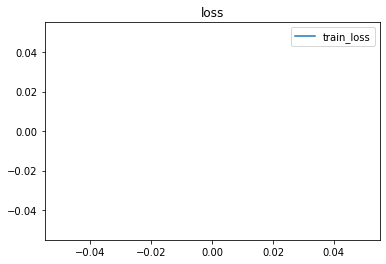

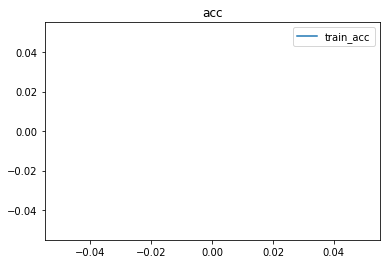

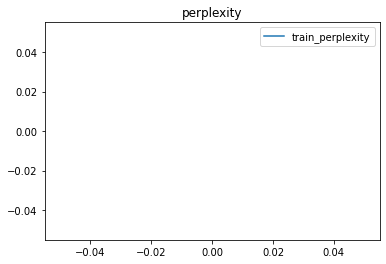

In [73]:
plt.figure()
plt.plot(running_loss[0:epoch+1], label = "train_loss")
plt.legend()
plt.title('loss')
plt.savefig('%s.png' % ("Q5_loss"))

plt.figure()
plt.plot(train_acc[0:epoch+1], label = "train_acc")
plt.legend()
plt.title('acc')
plt.savefig('%s.png' % ("Q5_acc"))

plt.figure()
plt.plot(train_perplexity[0:epoch+1], label = "train_perplexity")
plt.legend()
plt.title('perplexity')
plt.savefig('%s.png' % ("Q5_perplexity"))